In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from pymcdm.weights import entropy_weights
from pymcdm.methods import TOPSIS
from pymcdm.methods import WASPAS
from pymcdm.methods import VIKOR
from pymcdm.helpers import rrankdata
import pymcdm as pm

In [4]:
data = pd.read_csv('data_1.csv')

In [5]:
criteria_names = []
for el in data:
    if el != "geo":
        criteria_names.append(el)
print(criteria_names)

['energy productivity', 'Gross available energy by product', 'Total energy supply by product', 'Final energy consumption by product', 'Final energy consumption in households', 'Final energy consumption in transport', 'Final energy consumption in industry']


In [6]:
# Macierz decyzyjna
data_h = len(data['geo'])
data_w = len(criteria_names)
matrix = []
i = 0
while i < data_h:
    tmp_array = []
    for el in criteria_names:
        tmp_array.append(data[el][i])
    matrix.append(tmp_array)
    i += 1
matrix = np.array(matrix)
np.set_printoptions(suppress=True, precision=3)
# print(matrix)

In [7]:
# Wyznaczenie wag
weights = entropy_weights(matrix)
print(weights)
types = np.array([1, 1, 1, -1, -1, -1, -1])
print(types)

[0.033 0.143 0.144 0.142 0.147 0.143 0.248]
[ 1  1  1 -1 -1 -1 -1]


# TOPSIS

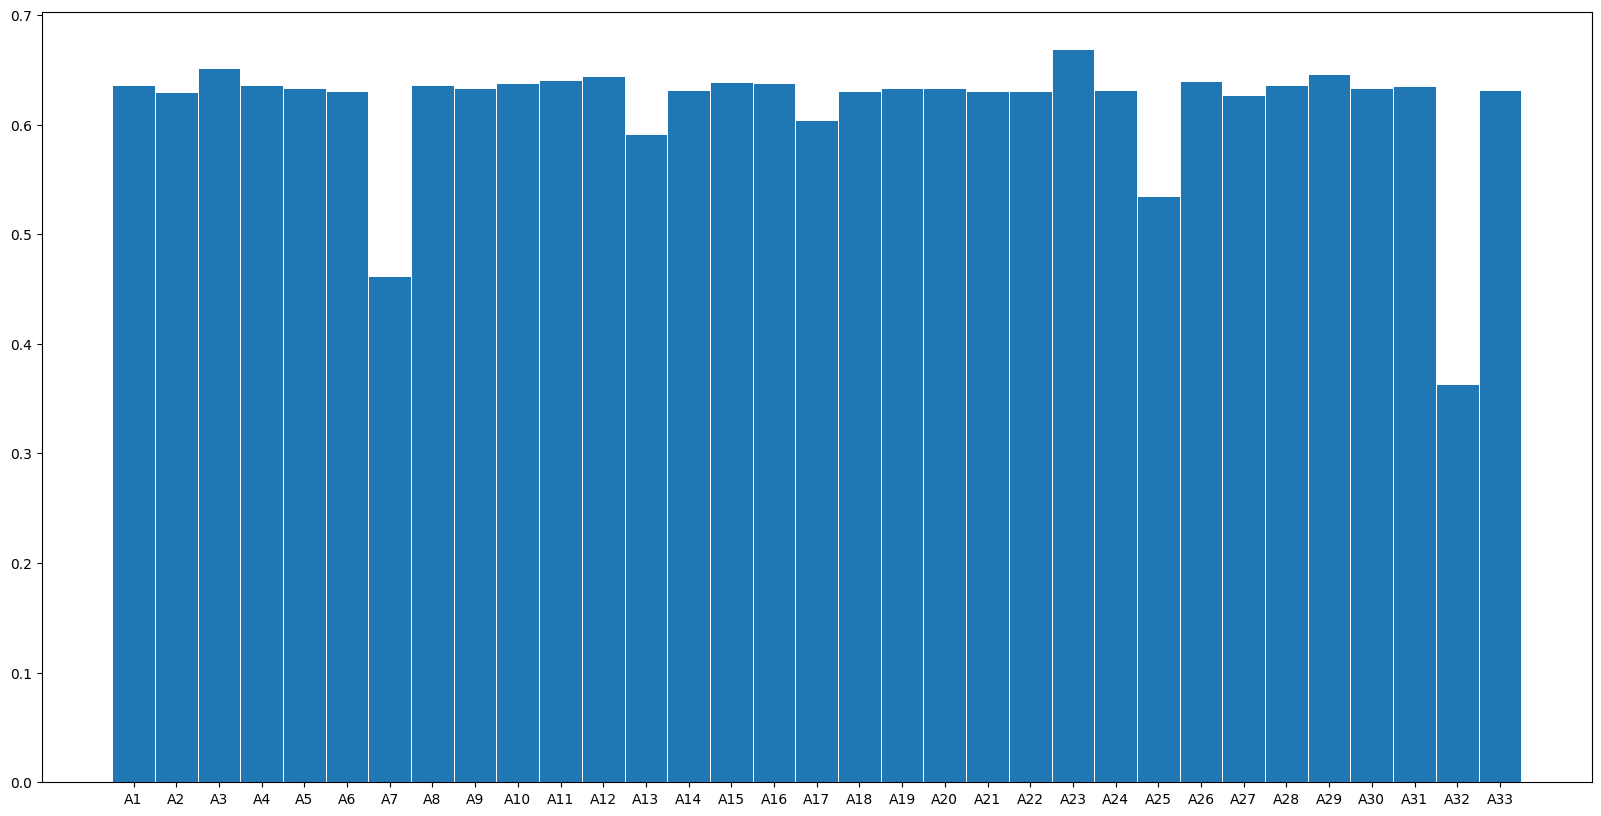

In [8]:
# TOPSIS
body = TOPSIS()
# [round(preference, 3) for preference in body(matrix, weights, types)]
pref = body(matrix, weights, types)
# print(len(data['geo']))
geo_list = [f'A{i+1}' for i in range(len(data['geo']))]
# print(geo_list)
results_TOPSIS = [round(pref[i], 3) for i in range(len(data['geo']))]
# for i in range(len(pref)):
#     print(f"{geo_list[i]} - {round(pref[i], 3)}")

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(geo_list, results_TOPSIS, width=1, edgecolor="white", linewidth=0.7)
# plt.savefig('img/TOPSIS_results.pdf', format="pdf")
plt.show()


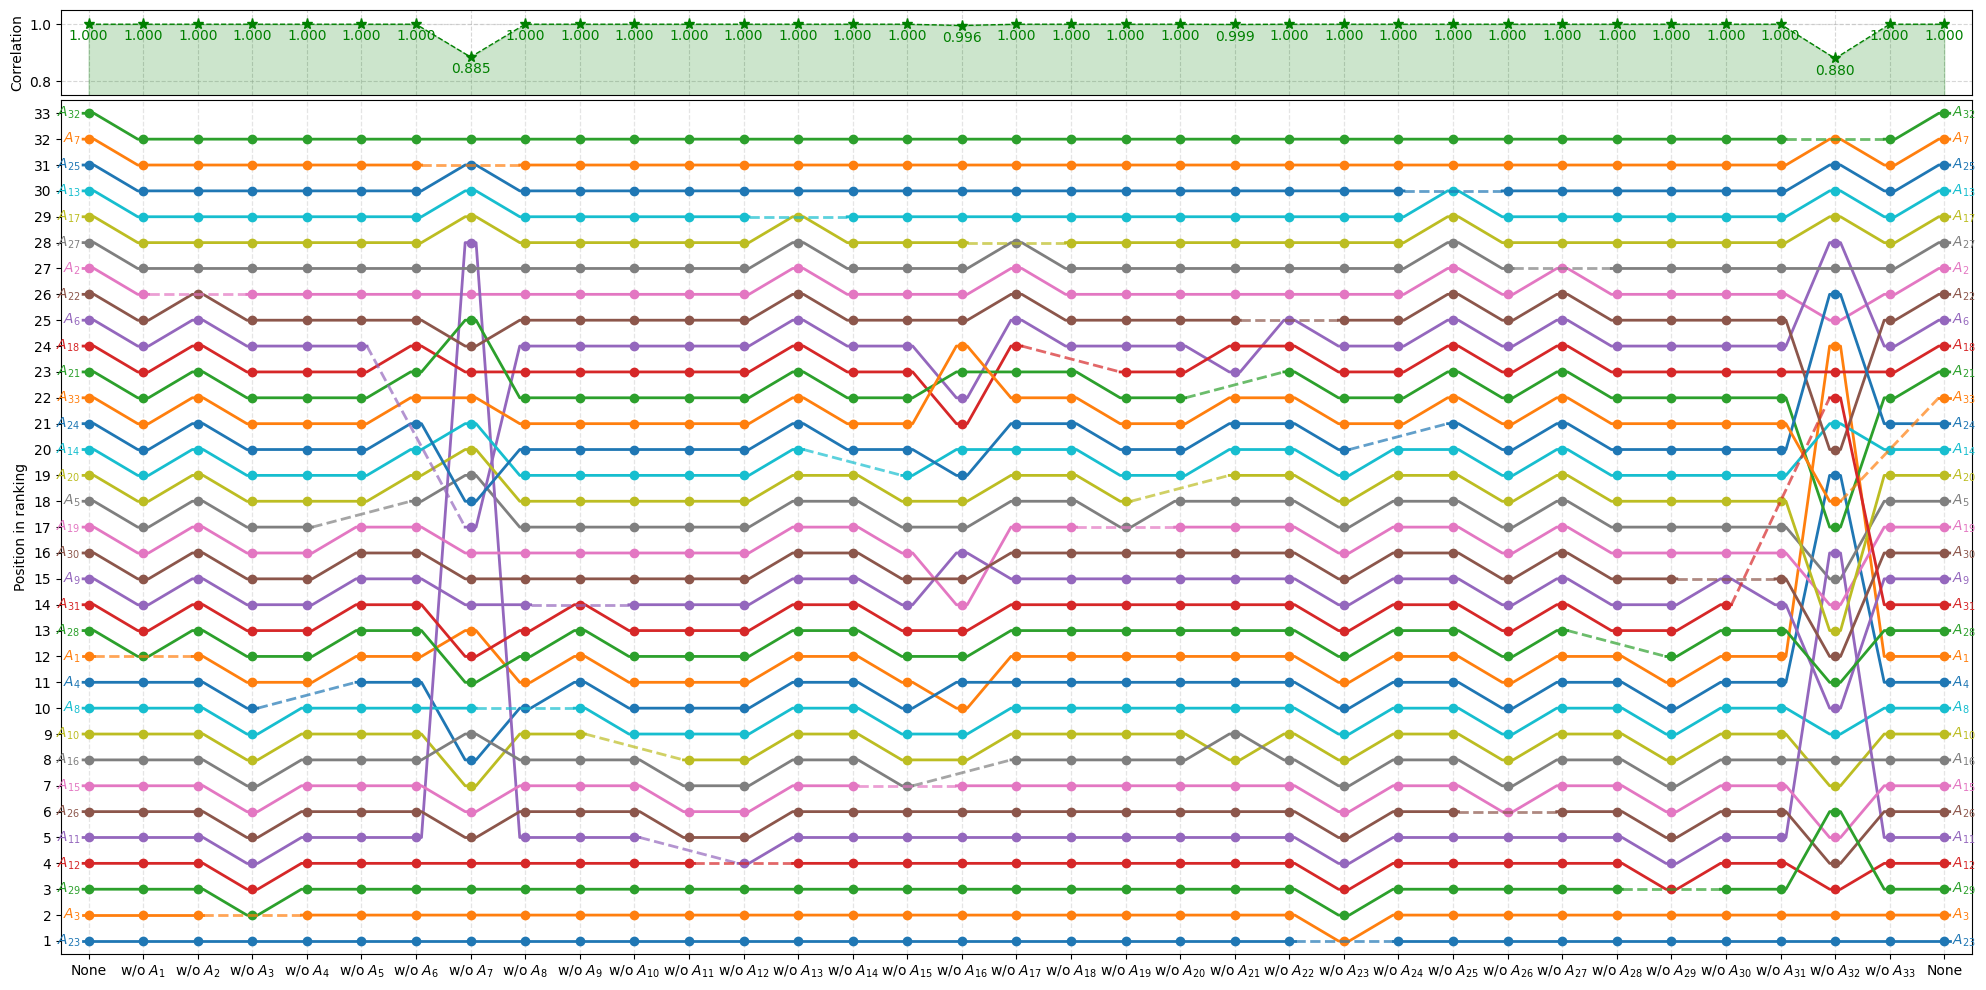

In [9]:
rankings, corr, labels = pm.helpers.leave_one_out_rr(
        method=body, matrix=matrix, weights=weights, types=types,
        corr_function=pm.correlations.weighted_spearman,
        only_rr=False)
 
# plot
fig, ax = plt.subplots(figsize=(20, 10))
ax, cax = pm.visuals.rankings_flow_correlation(
        rankings=rankings, correlations=corr, labels=labels,
        correlation_plot_kwargs=dict(space_multiplier=0.15),
        ranking_flows_kwargs=dict(better_grid=True),
        correlation_ax_size='10%',
        ax=ax)
cax.set_ylim(0.75, 1.05)
plt.tight_layout()
# plt.savefig('img/TOPSIS.pdf', format="pdf")
plt.show()

# WASPAS

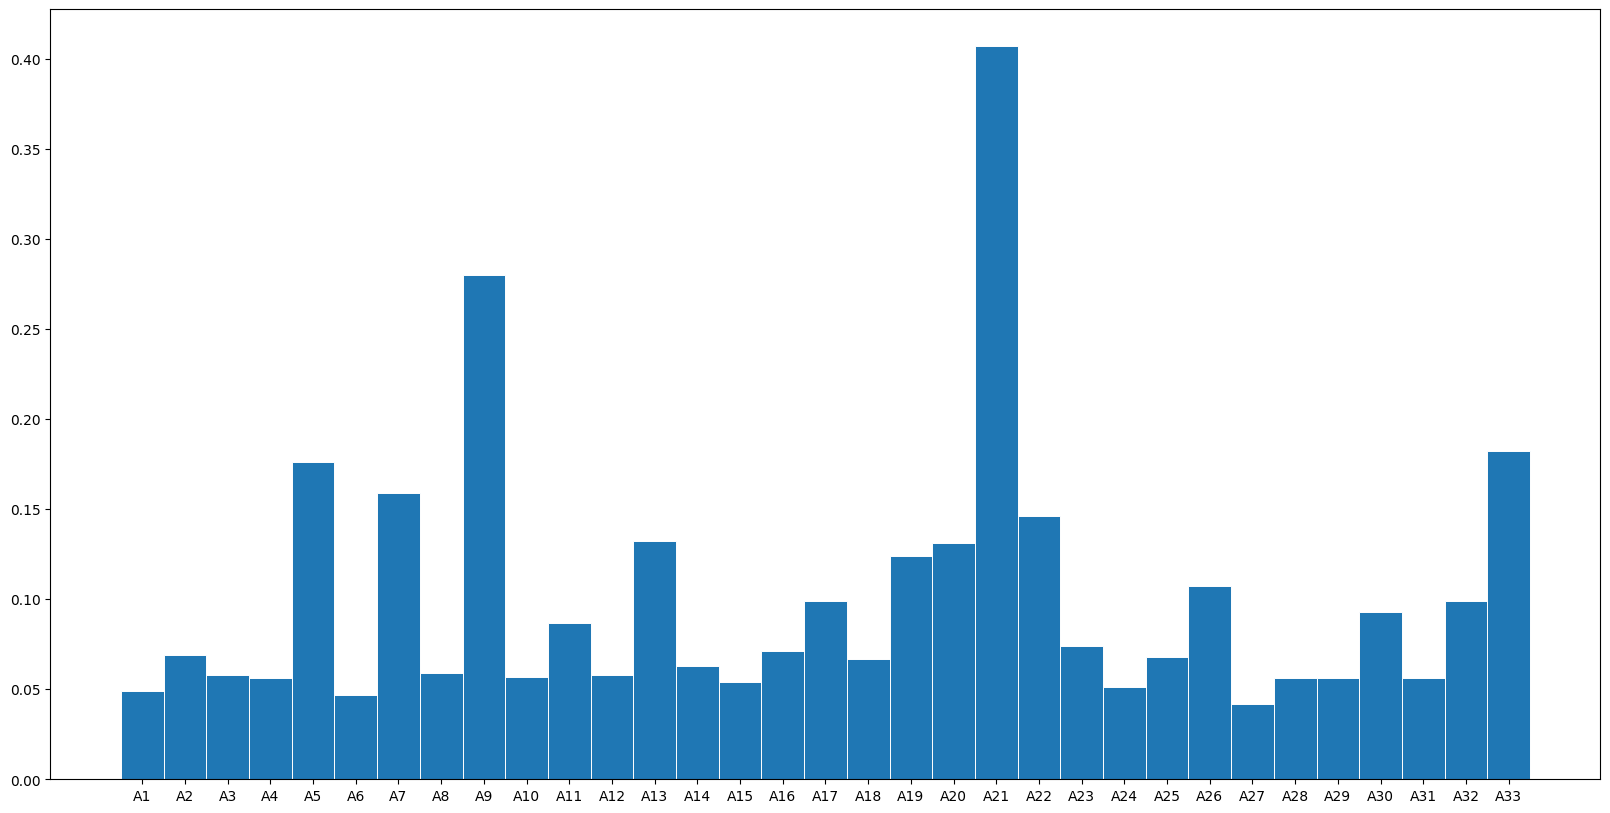

In [10]:
# WASPAS
body = WASPAS()
# [round(preference, 4) for preference in body(matrix, weights, types)]
pref = body(matrix, weights, types)
# for i in range(len(pref)):
#     print(f"{data['geo'][i]} - {round(pref[i], 4)}")

results_WASPAS = [round(pref[i], 3) for i in range(len(data['geo']))]
# for i in range(len(pref)):
#     print(f"{geo_list[i]} - {round(pref[i], 3)}")

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(geo_list, results_WASPAS, width=1, edgecolor="white", linewidth=0.7)
# plt.savefig('img/WASPAS_results.pdf', format="pdf")
plt.show()

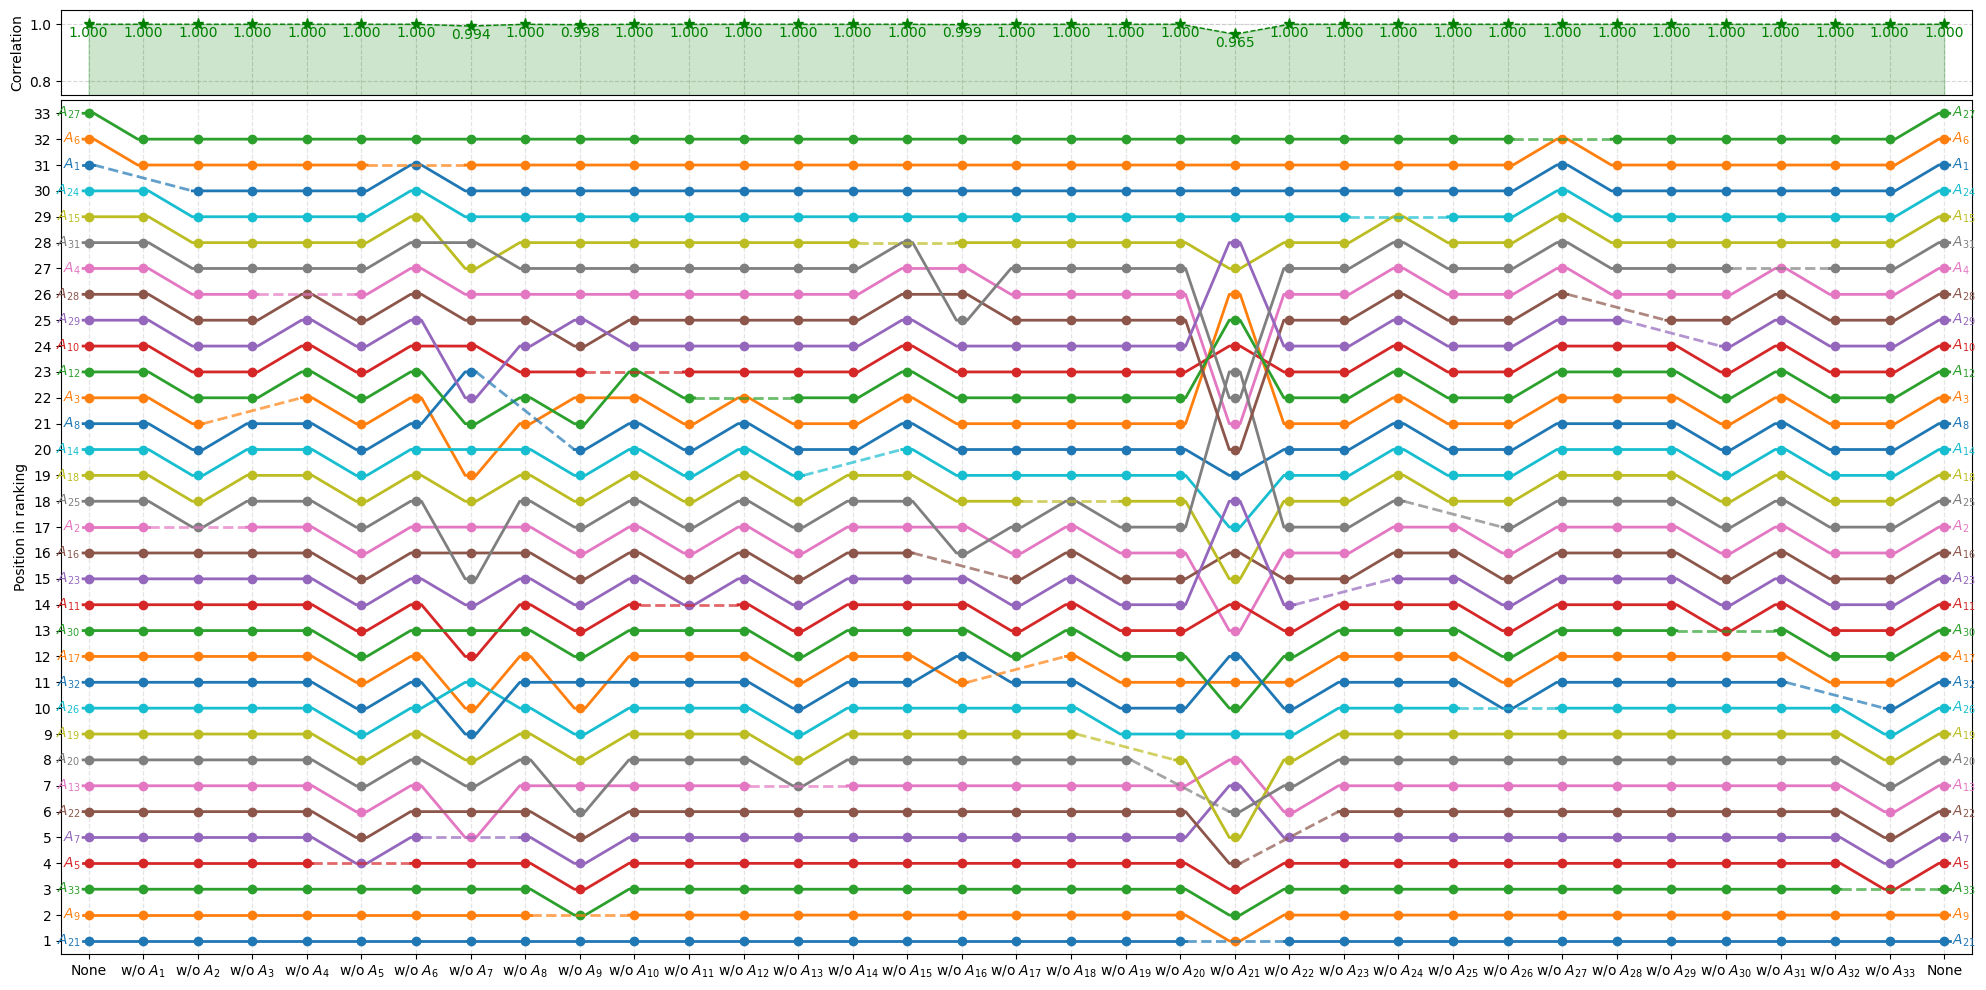

In [11]:
rankings, corr, labels = pm.helpers.leave_one_out_rr(
        method=body, matrix=matrix, weights=weights, types=types,
        corr_function=pm.correlations.weighted_spearman,
        only_rr=False)
 
# plot
fig, ax = plt.subplots(figsize=(20, 10))
ax, cax = pm.visuals.rankings_flow_correlation(
        rankings=rankings, correlations=corr, labels=labels,
        correlation_plot_kwargs=dict(space_multiplier=0.15),
        ranking_flows_kwargs=dict(better_grid=True),
        correlation_ax_size='10%',
        ax=ax)
cax.set_ylim(0.75, 1.05)
plt.tight_layout()
# plt.savefig('img/WASPAS.pdf', format="pdf")
plt.show()

# VIKOR

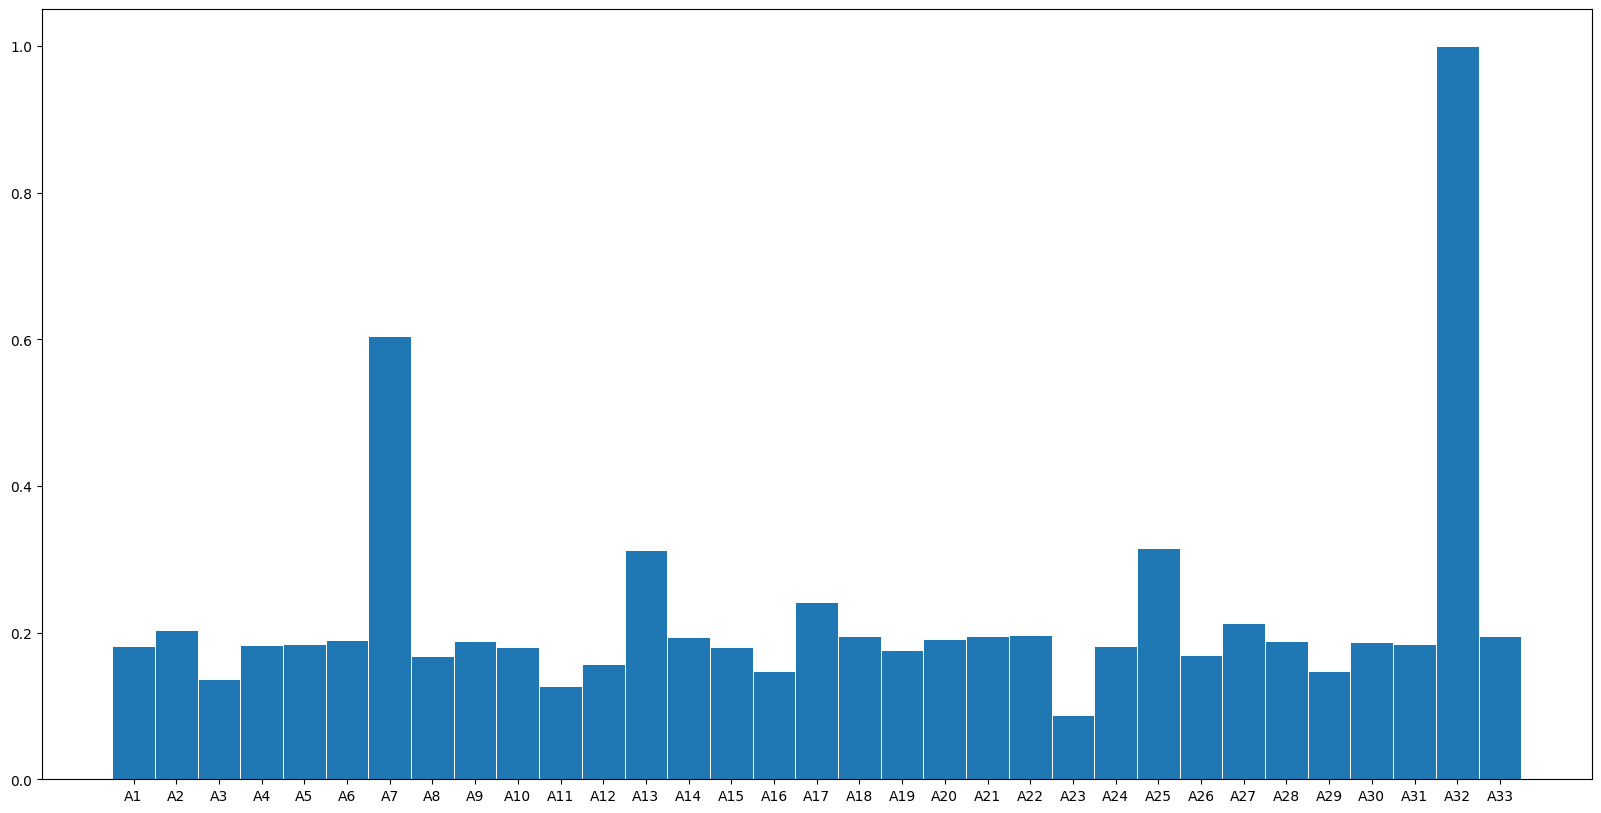

In [12]:
# VIKOR
body = VIKOR()
# [round(preference, 4) for preference in body(matrix, weights, types)]
pref = body(matrix, weights, types)
# for i in range(len(pref)):
#     print(f"{data['geo'][i]} - {round(pref[i], 4)}")

results_VIKOR = [round(pref[i], 3) for i in range(len(data['geo']))]
# for i in range(len(pref)):
#     print(f"{geo_list[i]} - {round(pref[i], 3)}")

fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(geo_list, results_VIKOR, width=1, edgecolor="white", linewidth=0.7)
# plt.savefig('img/VIKOR_results.pdf', format="pdf")
plt.show()

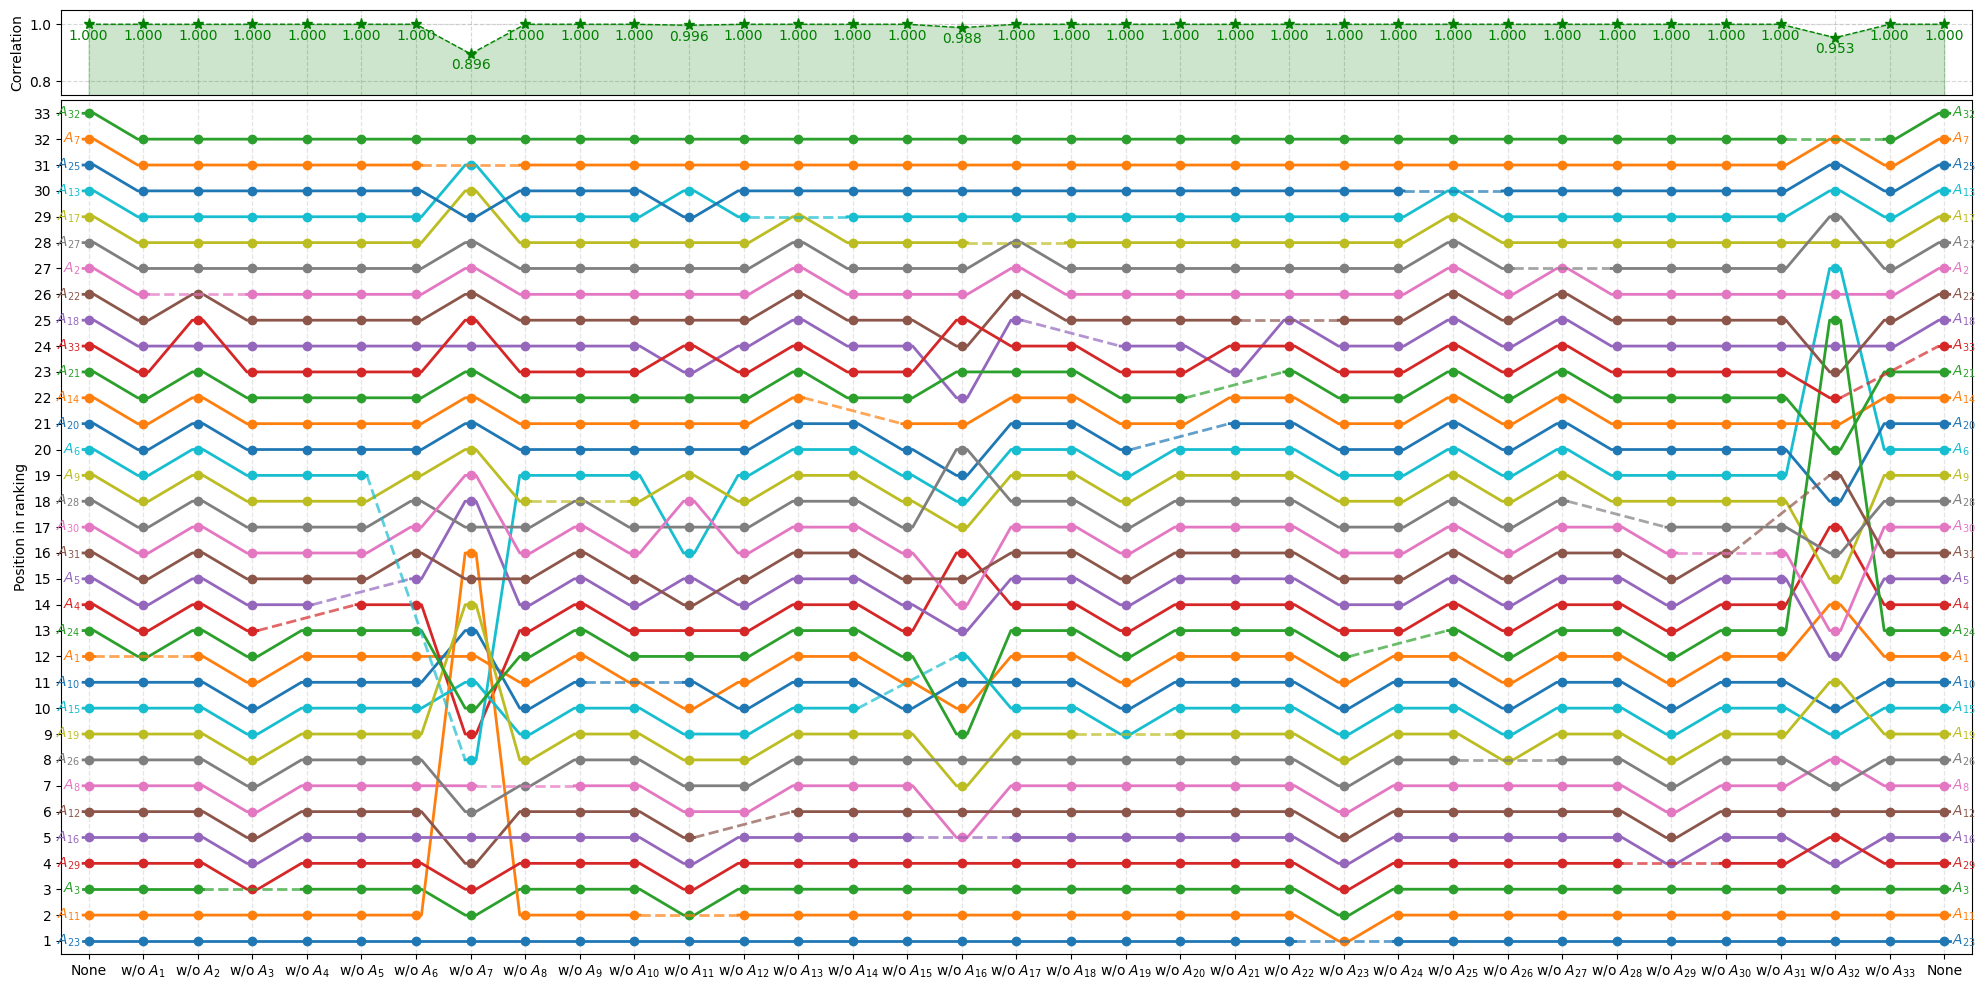

In [13]:
rankings, corr, labels = pm.helpers.leave_one_out_rr(
        method=body, matrix=matrix, weights=weights, types=types,
        corr_function=pm.correlations.weighted_spearman,
        only_rr=False)
 
# plot
fig, ax = plt.subplots(figsize=(20, 10))
ax, cax = pm.visuals.rankings_flow_correlation(
        rankings=rankings, correlations=corr, labels=labels,
        correlation_plot_kwargs=dict(space_multiplier=0.15),
        ranking_flows_kwargs=dict(better_grid=True),
        correlation_ax_size='10%',
        ax=ax)
cax.set_ylim(0.75, 1.05)
plt.tight_layout()
# plt.savefig('img/VIKOR.pdf', format="pdf")
plt.show()

In [14]:
from pymcdm import visuals

In [15]:
methods = [
    TOPSIS() ,
    WASPAS() ,
    VIKOR()
]
method_names = [ 'TOPSIS' , 'WASPAS' , 'VIKOR']
prefs = []
ranks = []

for method in methods :
    pref = method(matrix, weights, types)
    rank = method.rank(pref)
    prefs.append(pref)
    ranks.append(rank)

# tabelka wynikow

In [24]:
for i in range(len(prefs[0])):
    print(f"A{i+1} & {prefs[0][i]:.3f} & {int(ranks[0][i])} & {prefs[1][i]:.3f} & {int(ranks[1][i])} & {prefs[2][i]:.3f} & {int(ranks[2][i])} ---")

A1 & 0.636 & 12 & 0.049 & 31 & 0.182 & 12 ---
A2 & 0.630 & 27 & 0.069 & 17 & 0.204 & 27 ---
A3 & 0.652 & 2 & 0.058 & 22 & 0.137 & 3 ---
A4 & 0.636 & 11 & 0.056 & 27 & 0.183 & 14 ---
A5 & 0.633 & 18 & 0.176 & 4 & 0.185 & 15 ---
A6 & 0.631 & 25 & 0.047 & 32 & 0.190 & 20 ---
A7 & 0.462 & 32 & 0.159 & 5 & 0.605 & 32 ---
A8 & 0.636 & 10 & 0.059 & 21 & 0.168 & 7 ---
A9 & 0.633 & 15 & 0.280 & 2 & 0.189 & 19 ---
A10 & 0.638 & 9 & 0.057 & 24 & 0.181 & 11 ---
A11 & 0.641 & 5 & 0.087 & 14 & 0.127 & 2 ---
A12 & 0.644 & 4 & 0.058 & 23 & 0.157 & 6 ---
A13 & 0.591 & 30 & 0.132 & 7 & 0.313 & 30 ---
A14 & 0.632 & 20 & 0.063 & 20 & 0.194 & 22 ---
A15 & 0.639 & 7 & 0.054 & 29 & 0.180 & 10 ---
A16 & 0.638 & 8 & 0.071 & 16 & 0.147 & 5 ---
A17 & 0.604 & 29 & 0.099 & 12 & 0.242 & 29 ---
A18 & 0.631 & 24 & 0.067 & 19 & 0.196 & 25 ---
A19 & 0.633 & 17 & 0.124 & 9 & 0.176 & 9 ---
A20 & 0.633 & 19 & 0.131 & 8 & 0.191 & 21 ---
A21 & 0.631 & 23 & 0.407 & 1 & 0.195 & 23 ---
A22 & 0.631 & 26 & 0.146 & 6 & 0.197 & 26

In [17]:
import math

In [18]:
srednia_ary = sum(prefs[0])/len(prefs[0])

sr_ary2 = 0
for el in prefs[0]:
    sr_ary2 += el**2
sr_ary2 /= len(prefs[0])
print(f'średnia arytemtyczna z x^2 = {sr_ary2}')

wariancja = sr_ary2 - srednia_ary**2
print(f'wariancja = {wariancja}')

odch_sta = math.sqrt(wariancja)

print(f'TOPSIS odchylenie standardowe = {round(odch_sta, 3)}')

średnia arytemtyczna z x^2 = 0.3848375945937859
wariancja = 0.003301163800653928
TOPSIS odchylenie standardowe = 0.057


In [19]:
srednia_ary = sum(prefs[1])/len(prefs[1])

sr_ary2 = 0
for el in prefs[1]:
    sr_ary2 += el**2
sr_ary2 /= len(prefs[1])
print(f'średnia arytemtyczna z x^2 = {sr_ary2}')

wariancja = sr_ary2 - srednia_ary**2
print(f'wariancja = {wariancja}')

odch_sta = math.sqrt(wariancja)

print(f'WASPAS odchylenie standardowe = {round(odch_sta, 3)}')

średnia arytemtyczna z x^2 = 0.015700744752462952
wariancja = 0.0055086628849861305
WASPAS odchylenie standardowe = 0.074


In [20]:
srednia_ary = sum(prefs[2])/len(prefs[2])

sr_ary2 = 0
for el in prefs[2]:
    sr_ary2 += el**2
sr_ary2 /= len(prefs[2])
print(f'średnia arytemtyczna z x^2 = {sr_ary2}')

wariancja = sr_ary2 - srednia_ary**2
print(f'wariancja = {wariancja}')

odch_sta = math.sqrt(wariancja)

print(f'VIKOR odchylenie standardowe = {round(odch_sta, 3)}')

średnia arytemtyczna z x^2 = 0.07612911497507051
wariancja = 0.025663716110128562
VIKOR odchylenie standardowe = 0.16


In [21]:
def rw(rankx, ranky, n):
    suma = 0
    for i in range(n):
        suma += ((
            (rankx[i]-ranky[i])**2)
            *((n-rankx[i]+1)+(n-ranky[i]+1)
                    ))
    suma = 6 * suma
    suma = suma / (n**4 + n**3 - n**2 - n)
    return 1-suma

In [22]:
def WS(rankx, ranky, n):
    suma = 0
    for i in range(n):
        eq = 2 ** (-rankx[i])
        eq2 = abs(rankx[i] - ranky[i]) / max(abs(1 - rankx[i]), abs(n - rankx[i]))
        suma += eq * eq2
    return 1 - suma

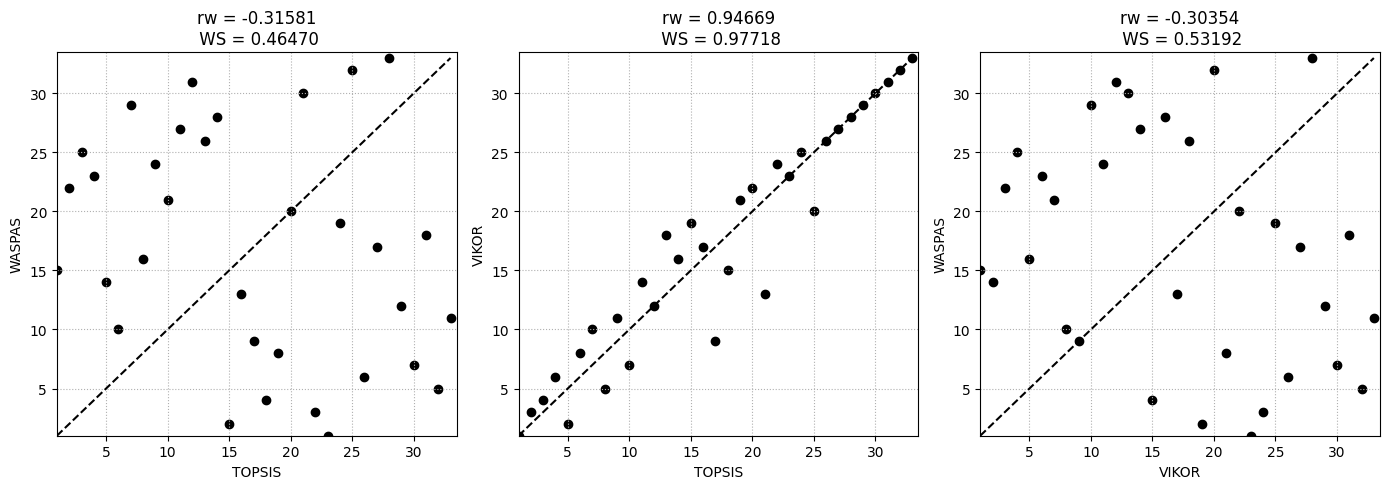

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))
val_size = len(ranks[0])

axes[0].scatter(ranks[0], ranks[1], color='black')
axes[0].plot([1, 33], [1, 33], 'k--')
axes[0].grid(True, linestyle=':')
axes[0].set_xlabel("TOPSIS")
axes[0].set_ylabel("WASPAS")

axes[0].set_title(f"rw = {rw(ranks[0], ranks[1], 33):.5f}\n WS = {WS(ranks[0], ranks[1], 33):.5f}")

axes[1].scatter(ranks[0], ranks[2], color='black')
axes[1].plot([1, 33], [1, 33], 'k--')
axes[1].grid(True, linestyle=':')
axes[1].set_xlabel("TOPSIS")
axes[1].set_ylabel("VIKOR")

axes[1].set_title(f"rw = {rw(ranks[0], ranks[2], 33):.5f}\n WS = {WS(ranks[0], ranks[2], 33):.5f}")

axes[2].scatter(ranks[2], ranks[1], color='black')
axes[2].plot([1, 33], [1, 33], 'k--')
axes[2].grid(True, linestyle=':')
axes[2].set_xlabel("VIKOR")
axes[2].set_ylabel("WASPAS")

axes[2].set_title(f"rw = {rw(ranks[2], ranks[1], 33):.5f}\n WS = {WS(ranks[2], ranks[1], 33):.5f}")

plt.setp(axes, xlim=(1,val_size+0.5), ylim=(1,val_size+0.5))
plt.tight_layout()
plt.savefig('img/ranking_scatter_comparison.pdf', format="pdf")
plt.show()

